<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-08-15 14:37:01--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-15 14:37:01--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-08-15 14:37:02--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [3]:
import numpy as np
from scipy import stats

## 6-1

In [4]:
np.random.seed(0)
sample_size = 10000
sample = np.array([np.random.binomial(1, 0.5) for _ in range(sample_size)])
head_count = sample.sum()
head_count_frequency = head_count / sample_size
assert head_count_frequency == sample.mean()

## 6-2

In [5]:
np.random.seed(0)
frequencies = np.random.binomial(sample_size, 0.5, 100000) / sample_size

## 6-3

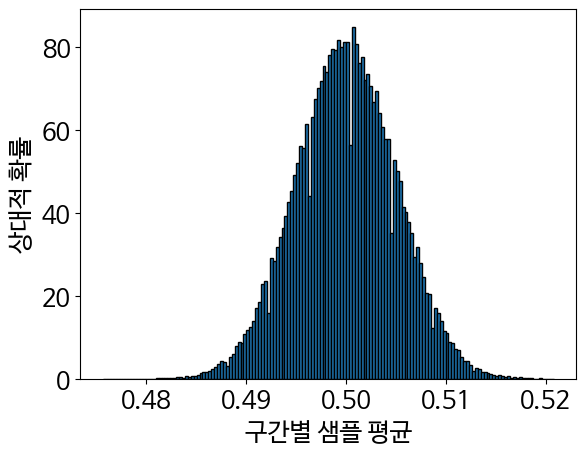

In [6]:
sample_means = frequencies
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', edgecolor='black', density=True)

plt.xlabel('구간별 샘플 평균')
plt.ylabel('상대적 확률')
plt.show()

## 6-4

In [7]:
# 5-13
def squared_distance(value1, value2):
    return (value1 - value2) ** 2

# 5-36
def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)

In [8]:
mean_normal = np.average(bin_edges[:-1], weights=likelihoods)
var_normal = weighted_variance(bin_edges[:-1], likelihoods)
std_normal = var_normal ** 0.5
print(f"평균은 약 {mean_normal:.2f}입니다.")
print(f"표준 편차는 약 {std_normal:.3f}입니다.")

평균은 약 0.50입니다.
표준 편차는 약 0.005입니다.


## 6-5

In [9]:
import math
peak_x_value = bin_edges[likelihoods.argmax()]
print(f"평균은 약 {peak_x_value:.2f}입니다.")
peak_y_value = likelihoods.max()
std_from_peak = (peak_y_value * (2* math.pi) ** 0.5) ** -1
print(f"표준 편차는 약 {std_from_peak:.3f}입니다.")

평균은 약 0.50입니다.
표준 편차는 약 0.005입니다.


## 6-6

In [10]:
fitted_mean, fitted_std = stats.norm.fit(sample_means)
print(f"평균은 약 {fitted_mean:.2f}입니다.")
print(f"표준 편차는 약 {fitted_std:.3f}입니다.")

평균은 약 0.50입니다.
표준 편차는 약 0.005입니다.


## 6-7

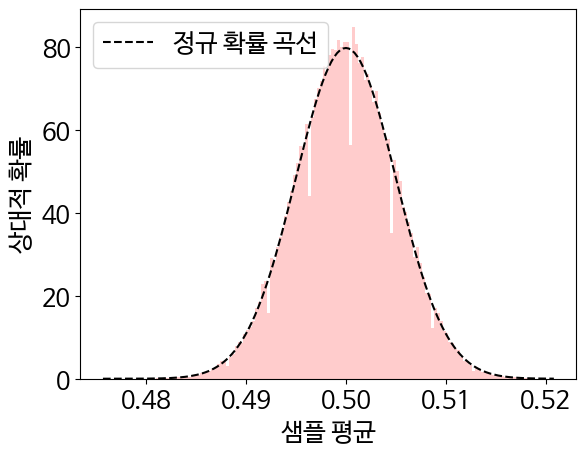

In [11]:
normal_likelihoods = stats.norm.pdf(bin_edges, fitted_mean, fitted_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--', label='정규 확률 곡선')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.legend()
plt.xlabel('샘플 평균')
plt.ylabel('상대적 확률')
plt.show()

## 6-8

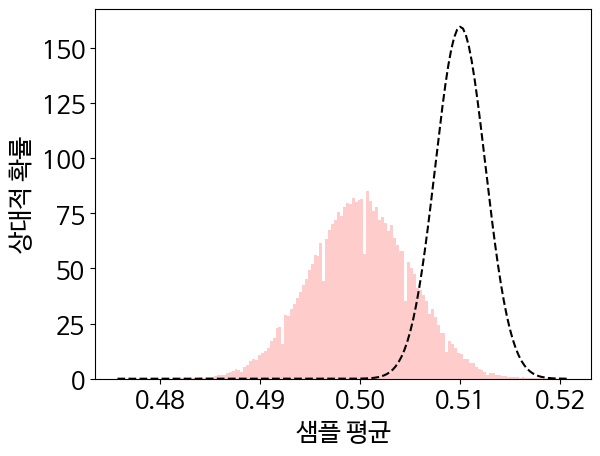

In [12]:
adjusted_likelihoods = stats.norm.pdf(bin_edges, fitted_mean + 0.01, fitted_std / 2)
plt.plot(bin_edges, adjusted_likelihoods, color='k', linestyle='--')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.xlabel('샘플 평균')
plt.ylabel('상대적 확률')
plt.show()

## 6-9

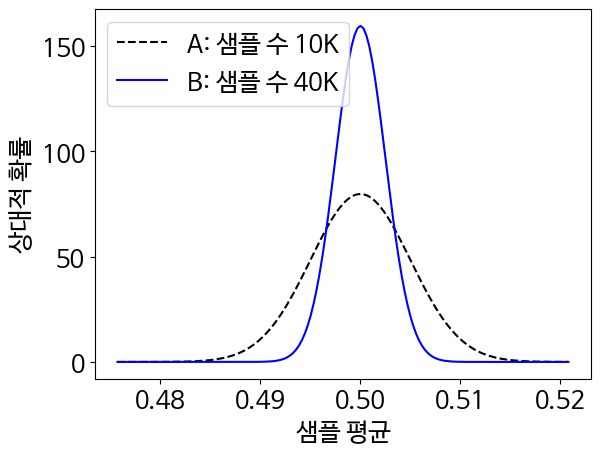

In [13]:
np.random.seed(0)
new_sample_size = 40000
new_head_counts = np.random.binomial(new_sample_size, 0.5, 100000)
new_mean, new_std = stats.norm.fit(new_head_counts / new_sample_size)
new_likelihoods = stats.norm.pdf(bin_edges, new_mean, new_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--', label='A: 샘플 수 10K')
plt.plot(bin_edges, new_likelihoods, color='b', label='B: 샘플 수 40K')
plt.legend()
plt.xlabel('샘플 평균')
plt.ylabel('상대적 확률')
plt.show()

## 6-10

In [14]:
mean, std = new_mean, new_std
start, end = stats.norm.interval(0.95, mean, std)
print(f"이항 분포로 샘플링된 참 평균은 {start:.3f}와 {end:.3f} 사이에 있습니다")

이항 분포로 샘플링된 참 평균은 0.495와 0.505 사이에 있습니다


## 6-11

In [15]:
assert stats.binom.mean(1, 0.5) == 0.5

## 6-12

In [16]:
variance_ratio = (new_std ** 2) / (fitted_std ** 2)
print(f"분산의 비율은 약 {variance_ratio:.2f}입니다")

분산의 비율은 약 0.25입니다


## 6-13

In [17]:
np.random.seed(0)
reduced_sample_size = 2500
head_counts = np.random.binomial(reduced_sample_size, 0.5, 100000)
_, std = stats.norm.fit(head_counts / reduced_sample_size)
variance_ratio = (std ** 2) / (fitted_std ** 2)
print(f" 분산의 비율은 약 {variance_ratio:.1f}입니다")

 분산의 비율은 약 4.0입니다


## 6-14

In [18]:
estimated_variance = (fitted_std ** 2) * 10000
print(f"샘플 크기가 1인 경우, 추정 분산은 {estimated_variance:.2f} 입니다")

샘플 크기가 1인 경우, 추정 분산은 0.25 입니다


## 6-15

In [19]:
assert stats.binom.var(1, 0.5) == 0.25

## 6-16

In [20]:
np.random.seed(0)
population_ages = np.random.randint(1, 85, size=50000)

## 6-17

In [21]:
population_mean = population_ages.mean()
population_variance = population_ages.var()

## 6-18

In [22]:
np.random.seed(0)
sample_size = 10
sample = np.random.choice(population_ages, size=sample_size)
sample_mean = sample.mean()

## 6-19

In [23]:
percent_diff = lambda v1, v2: 100 * abs(v1 - v2) / v2
percent_diff_means = percent_diff(sample_mean, population_mean)
print(f"평균에 대해 {percent_diff_means:.2f}%의 차이가 있습니다.")

평균에 대해 27.59%의 차이가 있습니다.


## 6-20

In [24]:
np.random.seed(0)
sample_means = [np.random.choice(population_ages, size=sample_size).mean() for _ in range(100)]

## 6-21

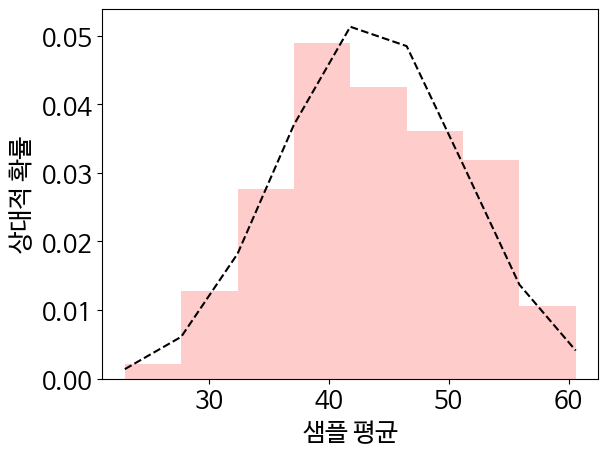

In [25]:
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
mean, std = stats.norm.fit(sample_means)
normal_likelihoods = stats.norm.pdf(bin_edges, mean, std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--')
plt.xlabel('샘플 평균')
plt.ylabel('상대적 확률')
plt.show()

## 6-22

In [26]:
print(f"실제 모집단 평균은 약 {population_mean:.2f} 입니다.")
percent_diff_means = percent_diff(mean, population_mean)
print(f"평균에 대해 {percent_diff_means:.2f}% 차이가 있습니다.")

실제 모집단 평균은 약 42.53 입니다.
평균에 대해 2.17% 차이가 있습니다.


## 6-23

In [27]:
normal_variance = std ** 2
estimated_variance = normal_variance * sample_size

## 6-24

In [28]:
print(f"추정 분산은 약 {estimated_variance:.2f} 입니다.")
print(f"실제 모집단 분산은 약 {population_variance:.2f} 입니다.")
percent_diff_var = percent_diff(estimated_variance, population_variance)
print(f"분산에 대해 {percent_diff_var:.2f}% 차이가 있습니다.")

추정 분산은 약 576.73 입니다.
실제 모집단 분산은 약 584.33 입니다.
분산에 대해 1.30% 차이가 있습니다.


## 6-25

In [29]:
population_mean = 84
population_variance = 25

## 6-26

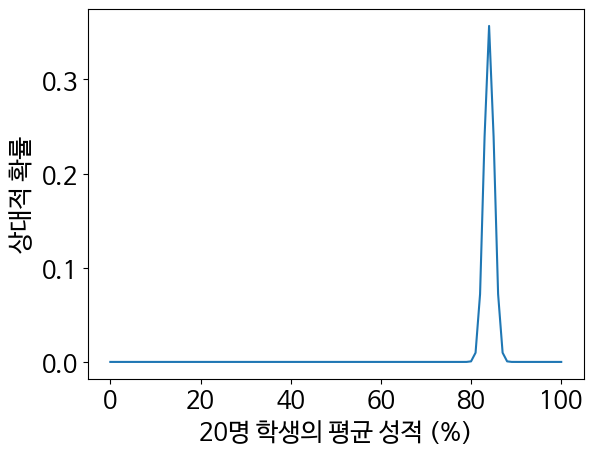

In [30]:
mean = population_mean
population_std = population_variance ** 0.5
sem = population_std / (20 ** 0.5)
grade_range = range(101)
normal_likelihoods = stats.norm.pdf(grade_range, mean, sem)
plt.plot(grade_range, normal_likelihoods)
plt.xlabel('20명 학생의 평균 성적 (%)')
plt.ylabel('상대적 확률')
plt.show()

## 6-27

In [31]:
total_area = np.sum([normal_likelihoods[i: i + 2].sum() / 2 for i in range(normal_likelihoods.size - 1)])
assert total_area == np.trapz(normal_likelihoods)
print(f"곡선 아래 예상 면적은 {total_area}입니다.")

곡선 아래 예상 면적은 1.0000000000384808입니다.


## 6-28

In [32]:
assert stats.norm.sf(0, mean, sem) == 1.0

## 6-29

In [34]:
assert stats.norm.sf(mean, mean, sem) == 0.5
estimated_area = np.trapz(normal_likelihoods[mean:])
print(f"평균을 초과하는 추정 면적은 {estimated_area} 입니다")

평균을 초과하는 추정 면적은 0.5000000000192404 입니다


## 6-30

In [35]:
area = stats.norm.sf(90, mean, sem)
print(f"20명의 학생이 시험에 합격할 확률은 {area} 입니다.")

20명의 학생이 시험에 합격할 확률은 4.012555633463782e-08 입니다.
